# About the Project:

In this project, we will classify a Heart Disease Dataset to predict people who have the disease.
The models used for this task are MLP and CNN that applied with Keras; also, we used a metaheuristic algorithm(HHO) to optimize the number of nodes in each layer.

## Introduction

WHO announced that cardiovascular diseases is the top one killer over the world. There are seventeen million people died from it every year, especially heart disease. Prevention is better than cure. If we can evaluate the risk of every patient who probably has heart disease, that is, not only patients but also everyone can do something earlier to keep illness away.

This dataset is a real data including important features of patients. This time we will build the predictable model by XGBoost library. Before predict the test dataset, use concept of crossvalid to find the optimised parameters. after that, the model can calculate the weight of each features, so we can easily understand which feature is more influent than others.

Confusion matrix is a common technique to figure out the accuracy of the model. From the standpoint of medicine, the recall rate is more important than precision rate because no one want to be misdiagnosed if the one actually have heart disease. So we will check the recall performance. After that, roc curve can help us evaluate the model, and then we'll explore the features if the model is good enough.

"Shap" is a powerful library to know whether each feature is positive or negative relationship with heart disease. At the end of the report, we double confirm the result, and we can also know which feature affect each patient the most.

## Exploratory Analysis

### There are thirteen features and one target as below:

* age: The person's age in years

* sex: The person's sex (1 = male, 0 = female)

* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

* chol: The person's cholesterol measurement in mg/dl

* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

* thalach: The person's maximum heart rate achieved

* exang: Exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

* ca: The number of major vessels (0-3)

* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* target: Heart disease (0 = no, 1 = yes)

# Importing Libraries and Data

In [1]:
pip install pygad

Note: you may need to restart the kernel to use updated packages.


'C:\Users\shima' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pygad.kerasga

In [3]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = df.drop("target", axis=1)
y = df["target"]

# Information About Data

In [5]:
def explore_dataframe(df):
    print("-"*30)
    print("Overall Info of Columns :")
    print(df.info()) 
    print("-"*30)
    print("Quantity of Nans :")
    print(df.isna().sum()) 
    print("-"*30)
    print("Percentage of Nans :")
    print(df.isna().mean()*100) 
    print("-"*30)
    print("Variable Types :")
    print(df.dtypes)
    print("-"*30)

In [6]:
explore_dataframe(df)

------------------------------
Overall Info of Columns :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
------------------------------
Quantity of Nans :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach  

# Visualization 

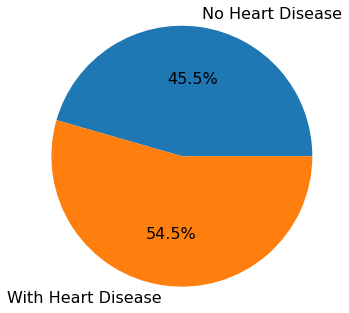

In [7]:
df_target = df.groupby("target").size()
plt.pie(df_target.values, labels = ["No Heart Disease", "With Heart Disease"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

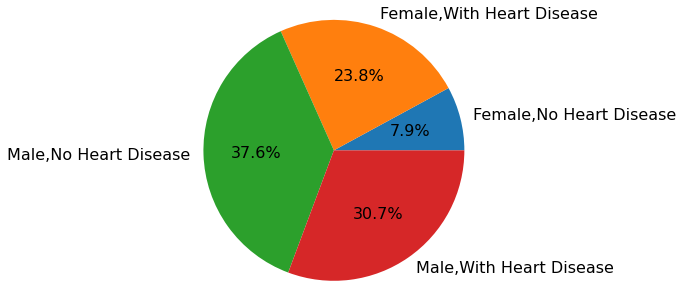

In [8]:
df_sex = df.groupby(["sex","target"]).size()
plt.pie(df_sex.values, labels = ["Female,No Heart Disease", "Female,With Heart Disease", "Male,No Heart Disease", "Male,With Heart Disease"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

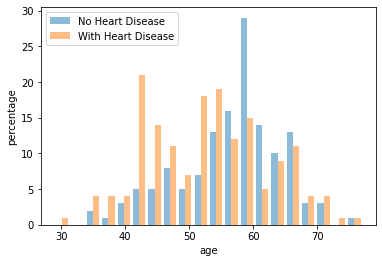

In [9]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

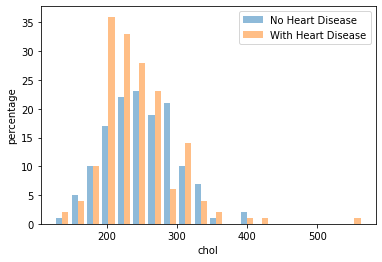

In [10]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

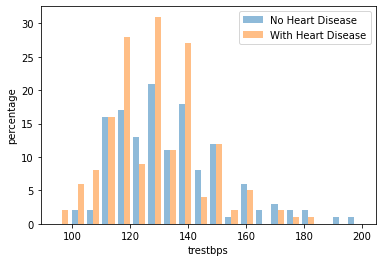

In [11]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

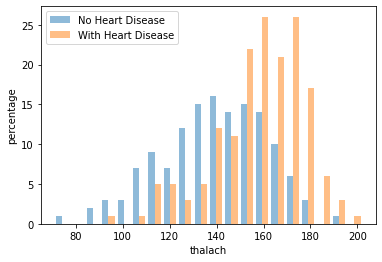

In [12]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["No Heart Disease","With Heart Disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

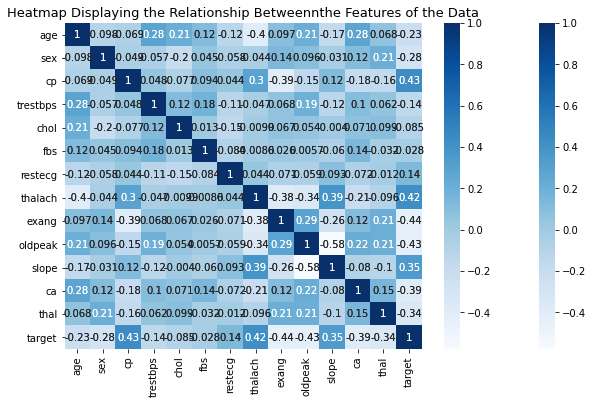

In [13]:
plt.figure(figsize=(10,6))
plt.title('Heatmap Displaying the Relationship Betweennthe Features of the Data',fontsize=13)
sns.heatmap(df.corr(), annot=True, cmap='Blues')
hm = sns.heatmap(df.corr(), annot=True, cmap='Blues')

## Feature Importance 

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.06800507 0.05289671 0.12978109 0.0665559  0.05895743 0.02064751
 0.03531155 0.0833585  0.09680329 0.08828165 0.07228549 0.13079963
 0.09631618]


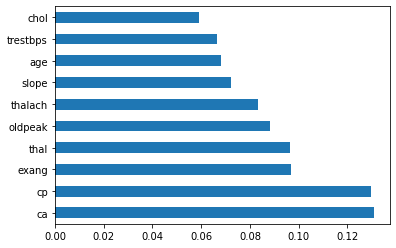

In [14]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_ , index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
X = df[['ca','cp','thal','exang','thalach','oldpeak','age','age','slope','trestbps','chol']]

In [16]:
X = df.loc[:, df.columns != 'target']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
X=scl.fit_transform(X)

In [18]:
X = tf.keras.utils.normalize(X, axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212, 13) (91, 13) (212,) (91,)


### **HHO**


In [20]:
import random
import numpy
import math


def Levy(dim):
    beta=1.5
    sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta) 
    u= 0.01*numpy.random.randn(dim)*sigma
    v = numpy.random.randn(dim)
    zz = numpy.power(numpy.absolute(v),(1/beta))
    step = numpy.divide(u,zz)
    return step



def HHO(objf,lb,ub,dim,SearchAgents_no,Max_iter):

    #dim=30
    #SearchAgents_no=50
    #lb=-100
    #ub=100
    #Max_iter=500
        
    
    # initialize the location and Energy of the rabbit
    Rabbit_Location=numpy.zeros(dim)
    Rabbit_Energy=float("inf")  #change this to -inf for maximization problems
    
    if not isinstance(lb, list):
        lb = [lb for _ in range(dim)]
        ub = [ub for _ in range(dim)]
    lb = numpy.asarray(lb)
    ub = numpy.asarray(ub)
         
    #Initialize the locations of Harris' hawks
    X=numpy.zeros((SearchAgents_no, dim))
    for i in range(SearchAgents_no):
        for d in range(dim):
            if(numpy.random.rand()>0.5):
                X[i,d] = 1;
            
    fitR = math.inf; 
    fit  = numpy.zeros((N)); 
    Y    = numpy.zeros((dim)); 
    Z    = numpy.zeros((dim));
    
    curve =numpy.zeros(max_Iter);  
    t = 1; 
    
    
    #---Iteration start-------------------------------------------------
    while t <= max_Iter:
      for i in range(SearchAgents_no):
        fit[i] =objf(X[i,:]) #fun(feat,label,X(i,:),HO);
        if fit[i] < fitR:
          fitR = fit[i]
          Xrb  = X[i,:]
    
      X_mu = numpy.mean(X,0);
      for i in range(SearchAgents_no):
        E0 = -1 + 2 * numpy.random.rand();
        E  = 2 * E0 * (1 - (t / max_Iter)); 
        if abs(E) >= 1:
          q = numpy.random.rand(); 
          if q >= 0.5:
            k  = numpy.random.randint(1,SearchAgents_no);
            r1 = numpy.random.rand();
            r2 = numpy.random.rand();
            for d in range(dim):
              Xn = X[k,d] - r1 * abs(X[k,d] - 2 * r2 * X[i,d]);
              S  = 1 / (1 + numpy.exp(-Xn));
              if numpy.random.rand() < S:
                X[i,d]= 1
              else:
                X[i,d] = 0
 
          elif q < 0.5:
            r3 = numpy.random.rand();
            r4 = numpy.random.rand();
            for d in range(dim):
              Xn = (Xrb[d]- X_mu[d]) - r3 * (lb + r4 * (ub - lb));
              S  = 1 / (1 + numpy.exp(-Xn));
              if numpy.random.rand() < S[0]:
                X[i,d] = 1;
              else:
                X[i,d] = 0;
        elif abs(E) < 1:
          J = 2 * (1 - numpy.random.rand());
          r = numpy.random.rand();
          if r >= 0.5  and  abs(E) >= 0.5:
            for  d in range(dim):
              DX = Xrb[d] - X[i,d];
              Xn = DX - E * abs(J * Xrb[d]- X[i,d]);
              S  = 1 / (1 + numpy.exp(-Xn));
              if numpy.random.rand() < S:
                 X[i,d]= 1
              else:
                X[i,d] = 0;
 
          elif r >= 0.5  and  abs(E) < 0.5:
            for  d in range(dim):
              DX = Xrb[d] - X[i,d];
              Xn = Xrb[d]- E * abs(DX);
              S  = 1 / (1 + numpy.exp(-Xn));
              if numpy.random.rand() < S:
                 X[i,d]= 1
              else:
                 X[i,d]= 0
 
          elif r < 0.5  and  abs(E) >= 0.5:
            LF = Levy(dim); 
            for  d in range(dim):
              Yn = Xrb[d] - E * abs(J * Xrb[d] - X[i,d]);
              S  = 1 / (1 + numpy.exp(-Yn));
              if numpy.random.rand() < S:
                Y[d] = 1;
              else:
                Y[d] = 0;
 
              Zn = Y[d] + numpy.random.rand() * LF[d];
              S  = 1 / (1 + numpy.exp(-Zn));
              if numpy.random.rand() < S:
                Z[d]= 1;
              else:
                Z[d] = 0;
 
            fitY =objf(Y)# fun(feat,label,Y,HO);
            fitZ =objf(Z)# fun(feat,label,Z,HO);
            if fitY <= fit[i]:
              fit[i] = fitY; 
              X[i,:]= Y;
 
            if fitZ <= fit[i]:
              fit[i] = fitZ;
              X[i,:]= Z;
 
          elif r < 0.5  and  abs(E) < 0.5:
            LF = Levy(dim); 
            for  d in range(dim):
              Yn = Xrb[d] - E * abs(J * Xrb[d] - X_mu[d]);
              S  = 1 / (1 + numpy.exp(-Yn));
              if numpy.random.rand() < S:
                Y[d]= 1;
              else:
                 Y[d] = 0;
 
              Zn = Y[d] + numpy.random.rand() * LF[d];
              S  = 1 / (1 + numpy.exp(-Zn));
              if numpy.random.rand() < S:
                Z[d] = 1;
              else:
                Z[d] = 0;
 
            fitY =objf(Y)# fun(feat,label,Y,HO); 
            fitZ =objf(Z)# fun(feat,label,Z,HO);
            if fitY <= fit[i]:
              fit[i] = fitY; 
              X[i,:] = Y;
        
            if fitZ <= fit[i]:
              fit[i] = fitZ; 
              X[i,:] = Z;
  
    
  
      curve[t-1] = fitR; 
      print('\nIteration{0} Best (BHHO)= {1}'.format(t,curve[t-1]))
      t = t + 1;

        
      


    
    return curve,Xrb

# **MLP Model**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def Create_mlp_model(data,array_ner):
  model = keras.Sequential([
      layers.Dense(array_ner[0], activation='relu', input_shape=[data.shape[1]]),
      layers.Dropout(0.5),
      layers.BatchNormalization(),
      layers.Dense(array_ner[1], activation='relu'), 
      layers.Dropout(0.5),
      layers.BatchNormalization(),
      layers.Dense(array_ner[2], activation='relu'), 
      #layers.Dropout(0.3),
      layers.BatchNormalization(),
      layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])
  return model
  


In [22]:
def funcost(x):
  x[x>=0.5]=1;
  x[x<0.5]=0;
  x=x.astype(int)
  print(x)
  array_ner=np.zeros(3,dtype=int)
  array_ner[0]=int(''.join([str(elem) for elem in x[0:10]]),2)
  array_ner[1]=int(''.join([str(elem) for elem in x[10:20]]),2)
  array_ner[2]= int(''.join([str(elem) for elem in x[20:30]]),2)
  print(array_ner)
  
  model=Create_mlp_model(data_test,array_ner)
  model.fit(data_train,lbl_train,epochs=100,batch_size=20, verbose=0)
  loss, accuracy = model.evaluate(data_test, lbl_test, verbose=0)

  acc=accuracy
  print(acc)
  return 1/acc

In [23]:
data_train, data_test, lbl_train, lbl_test = train_test_split( X, y, test_size=0.50, random_state=10, shuffle=True)

In [24]:
N= 10; 
max_Iter = 100;
objf=funcost
lb=0
ub=1
dim = 30;
curve,best_sol=HHO(objf,lb,ub,dim,N,max_Iter)


[0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1]
[ 97 668  53]
0.7894737124443054
[1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0]
[612 155 408]
0.7894737124443054
[0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0]
[ 88 861 716]
0.7960526347160339
[1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0]
[947 311 828]
0.7960526347160339
[0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1]
[330 935 345]
0.7763158082962036
[1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1]
[914 401 669]
0.8026315569877625
[1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1]
[696 933 433]
0.7960526347160339
[0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1]
[362 460 853]
0.7960526347160339
[1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1]
[564 929 735]
0.7631579041481018
[0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1]
[411 214 121]
0.7960526347160339
[1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1

0.8092105388641357
[1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1]
[1017  552  859]
0.7631579041481018
[1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1]
[687 702 183]
0.7828947305679321
[1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1]
[996 539 159]
0.7960526347160339
[1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1]
[951 924 405]
0.7763158082962036
[1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1]
[714 956 975]
0.7631579041481018

Iteration6 Best (BHHO)= 1.2063492109145406
[1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1]
[718 426 735]
0.7763158082962036
[1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0]
[765 545 168]
0.7697368264198303
[1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0]
[647 605 266]
0.7631579041481018
[1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1]
[ 798  621 1021]
0.7697368264198303
[0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0]
[259 731   2]


0.8355262875556946
[1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0]
[777 604 952]
0.7697368264198303
[0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
[415 254 495]
0.8223684430122375
[1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]
[880 522   3]
0.7894737124443054
[1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1]
[532 993 945]
0.7828947305679321
[1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0]
[660 491 808]
0.7434210777282715
[0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1]
[469 266 813]
0.7565789222717285
[1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1]
[734 815 655]
0.8289473652839661
[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1]
[ 991  935 1021]
0.7894737124443054
[1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]
[670 871 940]
0.7763158082962036
[1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
[734 239 958]
0.7960526347160339
[1 1 1 0 0 1 1 1 0 0 0 1 1 1

0.7697368264198303
[1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[939 983 767]
0.7697368264198303
[1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1]
[791 747 979]
0.7960526347160339
[1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1]
[921 703 963]
0.7763158082962036

Iteration16 Best (BHHO)= 1.1782945997761851
[1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0]
[929 402 310]
0.7960526347160339
[0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1]
[422 675  93]
0.7631579041481018
[0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1]
[462 695 951]
0.7763158082962036
[0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1]
[406 748 767]
0.7368420958518982
[0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1]
[486 866 221]
0.7894737124443054
[1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[939 983 767]
0.8092105388641357
[0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0]
[445 755 108]
0.802

0.5
[0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1]
[381 779 827]
0.7828947305679321

Iteration21 Best (BHHO)= 1.1782945997761851
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0]
[463 470 204]
0.7631579041481018
[1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1]
[542 108 191]
0.7894737124443054
[0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0]
[310  99 638]
0.7960526347160339
[1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1]
[752 595 999]
0.7565789222717285
[1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0]
[634  12 272]
0.7894737124443054
[0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1]
[381 779 827]
0.8026315569877625
[0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1]
[176 356 251]
0.8157894611358643
[0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1]
[438 354 189]
0.8157894611358643
[0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1]
[399 730 953]
0.8092105388641357
[

0.8157894611358643
[0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1]
[ 39 991 671]
0.7894737124443054

Iteration26 Best (BHHO)= 1.1782945997761851
[1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1]
[624 135 777]
0.7960526347160339
[0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
[494 667 957]
0.7631579041481018
[0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0]
[ 94 732  46]
0.7828947305679321
[1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1]
[635 671 719]
0.7697368264198303
[0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1]
[268 331 579]
0.7828947305679321
[1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0]
[841 648 468]
0.7631579041481018
[1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1]
[518 986 571]
0.7828947305679321
[0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1]
[284 223 295]
0.8355262875556946
[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1]
[ 63 509 917]
0.769

0.7828947305679321
[0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1]
[210 710 987]
0.8223684430122375
[1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1]
[949  23  99]
0.8157894611358643
[1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1]
[ 645  787 1015]
0.7894737124443054
[0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1]
[319 628 847]
0.7697368264198303
[0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1]
[414 677 259]
0.7631579041481018
[0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1]
[ 53 942 863]
0.7828947305679321
[1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1]
[1021  648 1007]
0.7697368264198303

Iteration31 Best (BHHO)= 1.1782945997761851
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1]
[1011   86  791]
0.7828947305679321
[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0]
[272 500 334]
0.7960526347160339
[1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1]
[863 851  

0.8157894611358643
[1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0]
[593 555 692]
0.7631579041481018
[0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0]
[341 507 888]
0.7565789222717285
[0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0]
[359 745 888]
0.7960526347160339
[0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0]
[511 247 240]
0.7960526347160339
[0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1]
[361 284 983]
0.8026315569877625
[0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1]
[196 887 713]
0.8223684430122375
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1]
[991 999 857]
0.7894737124443054
[1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
[887 766 128]
0.7697368264198303
[0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]
[509 766 925]
0.7697368264198303
[1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1]
[583 349 733]
0.8026315569877625
[1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 

0.7631579041481018

Iteration40 Best (BHHO)= 1.1782945997761851
[1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0]
[648 756 346]
0.7763158082962036
[1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0]
[535 117 156]
0.8026315569877625
[0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
[490 130 336]
0.8223684430122375
[0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0]
[375 315 412]
0.7763158082962036
[0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1]
[463 684 575]
0.7697368264198303
[1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1]
[958 537 685]
0.7697368264198303
[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1]
[382 381 629]
0.8026315569877625
[0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0]
[463 762 862]
0.8157894611358643
[0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1]
[383 631 509]
0.7828947305679321
[1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0]
[663 638 700]
0.75


0.7894737124443054
[1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1]
[ 972 1023  477]
0.7894737124443054
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1]
[1003 1003  729]
0.7697368264198303
[1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1]
[941 734 213]
0.7894737124443054
[1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1]
[ 967 1002   87]
0.7631579041481018
[0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1]
[  6 342 671]
0.7631579041481018
[0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
[  6 478 959]
0.5526315569877625
[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1]
[ 703 1005  205]
0.7697368264198303
[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0]
[ 639 1007  872]
0.7894737124443054
[0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0]
[372 759 616]
0.7960526347160339
[0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1]
[504 499 303]
0.7828947305679321

Iteration45 Bes

0.8157894611358643
[0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1]
[458 949 623]
0.7763158082962036
[1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0]
[927 710 420]
0.7828947305679321
[1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1]
[1003  437  327]
0.7631579041481018
[1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1]
[895 367 751]
0.7894737124443054

Iteration49 Best (BHHO)= 1.1782945997761851
[0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1]
[265  66 629]
0.8092105388641357
[1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1]
[747 958 339]
0.7697368264198303
[1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0]
[752 168 210]
0.8157894611358643
[0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0]
[283 445 280]
0.7697368264198303
[0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1]
[480 373  19]
0.7894737124443054
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1]
[1023  944  495]

0.7894737124443054
[0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0]
[307 642 378]
0.7894737124443054
[1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1]
[690 253 379]
0.8026315569877625
[0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0]
[ 98 576 116]
0.7960526347160339
[1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1]
[639  73 511]
0.8026315569877625
[0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0]
[355 454 630]
0.7763158082962036
[0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1]
[ 335  768 1007]
0.7697368264198303
[0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1]
[139 925 223]
0.7894737124443054
[1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0]
[695   1  70]
0.7631579041481018
[0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0]
[172 498 958]
0.7763158082962036
[0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0]
[507 763 958]
0.7631579041481018
[0 1 1 1 1 1 0 1 1 1 0 1 0 1

0.7894737124443054

Iteration57 Best (BHHO)= 1.1782945997761851
[1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0]
[693 890 988]
0.75
[1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0]
[664 378 476]
0.8157894611358643
[0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1]
[413 310 677]
0.8223684430122375
[1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1]
[736 505 473]
0.7960526347160339
[0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1]
[509 115 695]
0.8289473652839661
[0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1]
[217 239 391]
0.7894737124443054
[0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0]
[234 747 478]
0.7828947305679321
[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0]
[1023  378  476]
0.7763158082962036
[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1]
[954 754 125]
0.7894737124443054
[1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0]
[ 543 1003 1014]
0.78947371244

0.7828947305679321
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1]
[880 262 209]
0.8289473652839661
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0]
[1018 1003 1000]
0.7763158082962036
[0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1]
[436 845 419]
0.7697368264198303
[1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1]
[ 939  947 1005]
0.7565789222717285
[1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1]
[1021  767 1001]
0.7565789222717285
[0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1]
[ 500 1017  645]
0.7960526347160339
[1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0]
[ 751 1003 1000]
0.7828947305679321
[1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1]
[1018  408  959]
0.75
[0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1]
[213 507 747]
0.7894737124443054
[1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0]
[614 761 562]
0.7828947305679321
[0 1 0 1 1 0 0 1 1 0 0 1 1 

0.8026315569877625
[0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0]
[383 533 212]
0.7828947305679321
[0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1]
[508 991  51]
0.7828947305679321
[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1]
[1019  895  375]
0.7697368264198303

Iteration66 Best (BHHO)= 1.169230747787205
[1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1]
[986 706  95]
0.7828947305679321
[0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1]
[ 23 845 935]
0.8157894611358643
[1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1]
[827 971 231]
0.7565789222717285
[1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1]
[552  42 719]
0.8223684430122375
[0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1]
[375 837 355]
0.7697368264198303
[1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1]
[953 897 947]
0.7828947305679321
[0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1]
[ 159 1007  661]


0.7697368264198303
[0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1]
[  1 617 131]
0.5657894611358643
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0]
[1019  713  508]
0.7763158082962036
[1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1]
[995 348 937]
0.7631579041481018
[0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0]
[189 720 916]
0.8092105388641357
[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0]
[1020  981 1012]
0.7763158082962036
[1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1]
[918 891 949]
0.7894737124443054
[1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1]
[ 926 1018 1011]
0.7763158082962036
[0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1]
[510 367 955]
0.8092105388641357
[1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1]
[886 235 847]
0.7894737124443054
[0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0]
[503 757 162]
0.7763158082962036
[0 0 0 0 1 1 0 1 1 1 0

0.7631579041481018
[1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0]
[1003  315  252]
0.7828947305679321
[1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1]
[775 885  79]
0.7828947305679321
[1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1]
[943 252 989]
0.7828947305679321
[1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1]
[861 814 735]
0.7631579041481018
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1]
[987 985 955]
0.7434210777282715

Iteration75 Best (BHHO)= 1.169230747787205
[0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1]
[ 37  38 503]
0.7697368264198303
[0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0]
[116 357 958]
0.8092105388641357
[1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1]
[981 820 583]
0.7697368264198303
[1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1]
[519 965 923]
0.7697368264198303
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1]
[590 822 743]
0.7

0.75
[0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0]
[444 727 478]
0.7894737124443054
[0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0]
[376 574 886]
0.7697368264198303
[0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[ 49 979 255]
0.8223684430122375
[0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0]
[335 127 608]
0.7894737124443054
[1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0]
[629 877 882]
0.7960526347160339
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]
[726 479 975]
0.8157894611358643
[0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1]
[ 17 245 523]
0.7697368264198303
[0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
[311 221 900]
0.7828947305679321
[0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0]
[498 695 250]
0.7631579041481018
[0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1]
[ 190  714 1017]
0.7894737124443054
[0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1

0.7565789222717285
[1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1]
[694 957 617]
0.7631579041481018
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0]
[1017  494  862]
0.7631579041481018
[1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0]
[1015  285  794]
0.7960526347160339
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0]
[1023  397  898]
0.7631579041481018
[1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]
[831 827 961]
0.7631579041481018
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0]
[927 306 376]
0.7565789222717285
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1]
[991 889 799]
0.7631579041481018
[0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1]
[227 865 493]
0.7894737124443054
[1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1]
[758 364 893]
0.7894737124443054
[0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
[508 623 509]
0.7828947305679321
[0 1 0 0 1 1 1 1 1 1 0

0.7434210777282715
[1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0]
[911 493 742]
0.7302631735801697
[1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0]
[899 927 366]
0.7960526347160339
[1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]
[ 947 1021 1020]
0.7697368264198303
[1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0]
[693 894 812]
0.7631579041481018
[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1]
[ 957 1023  857]
0.7565789222717285
[1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1]
[735 157 973]
0.7565789222717285
[1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1]
[ 730  205 1021]
0.7631579041481018
[1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0]
[1004 1023  894]
0.7697368264198303
[0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
[ 397 1023  863]
0.75
[0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]
[ 67 927 703]
0.7894737124443054
[0 1 1 1 1 1 0 1 0 1 1 0 1 1 1

0.7763158082962036
[0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1]
[239 437 279]
0.7763158082962036
[0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1]
[ 31 367 119]
0.7631579041481018
[1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1]
[583 243 953]
0.7960526347160339
[1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0]
[767  27 702]
0.8092105388641357
[1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1]
[603 510 507]
0.8026315569877625
[1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
[689 511 891]
0.7960526347160339
[1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0]
[815 918 990]
0.8026315569877625
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1]
[1023  972  649]
0.7697368264198303

Iteration92 Best (BHHO)= 1.1603053561819094
[0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
[ 222  253 1023]
0.7763158082962036
[0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1]
[111 405 475]

0.7631579041481018
[1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0]
[671 964 474]
0.7894737124443054

Iteration96 Best (BHHO)= 1.1603053561819094
[0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
[509 334 875]
0.8223684430122375
[0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0]
[119 955 810]
0.8157894611358643
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1]
[ 253 1002  605]
0.7894737124443054
[0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1]
[407 315 319]
0.8157894611358643
[0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1]
[351 939 383]
0.7434210777282715
[0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1]
[371 959 763]
0.7894737124443054
[1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0]
[751 669 490]
0.7763158082962036
[0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0]
[414 475 834]
0.7828947305679321
[1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1]
[895 907 931]
0.

In [25]:
x=best_sol
x=x.astype(int)
array_ner=np.zeros(3,dtype=int)
array_ner[0]=int(''.join([str(elem) for elem in x[0:10]]),2)
array_ner[1]=int(''.join([str(elem) for elem in x[10:20]]),2)
array_ner[2]= int(''.join([str(elem) for elem in x[20:30]]),2)
print(array_ner)

[406 843 985]


In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(array_ner[0], activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(array_ner[1], activation='relu'), 
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(array_ner[2], activation='relu'), 
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=10,
    epochs=100,
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/100
22/22 [==============================] - 5s 54ms/step - loss: 0.8953 - binary_accuracy: 0.6887 - val_loss: 0.6780 - val_binary_accuracy: 0.5165
Epoch 2/100
22/22 [==============================] - 0s 20ms/step - loss: 0.8133 - binary_accuracy: 0.7453 - val_loss: 0.7072 - val_binary_accuracy: 0.5165
Epoch 3/100
22/22 [==============================] - 0s 20ms/step - loss: 0.6354 - binary_accuracy: 0.7925 - val_loss: 0.6611 - val_binary_accuracy: 0.5165
Epoch 4/100
22/22 [==============================] - 0s 21ms/step - loss: 0.6246 - binary_accuracy: 0.7972 - val_loss: 0.6381 - val_binary_accuracy: 0.6044
Epoch 5/100
22/22 [==============================] - 0s 20ms/step - loss: 0.4731 - binary_accuracy: 0.8349 - val_loss: 0.6443 - val_binary_accuracy: 0.7582
Epoch 6/100
22/22 [==============================] - 0s 20ms/step - loss: 0.5003 - binary_accuracy: 0.8160 - val_loss: 0.6517 - val_binary_accuracy: 0.6484
Epoch 7/100
22/22 [==============================] - 0s 20ms/ste

22/22 [==============================] - 0s 20ms/step - loss: 0.2895 - binary_accuracy: 0.8774 - val_loss: 0.4363 - val_binary_accuracy: 0.8352
Epoch 54/100
22/22 [==============================] - 0s 20ms/step - loss: 0.2464 - binary_accuracy: 0.8821 - val_loss: 0.4398 - val_binary_accuracy: 0.8681
Epoch 55/100
22/22 [==============================] - 0s 20ms/step - loss: 0.2973 - binary_accuracy: 0.8585 - val_loss: 0.3796 - val_binary_accuracy: 0.8571
Epoch 56/100
22/22 [==============================] - 0s 20ms/step - loss: 0.2710 - binary_accuracy: 0.9009 - val_loss: 0.4316 - val_binary_accuracy: 0.8571
Epoch 57/100
22/22 [==============================] - 0s 20ms/step - loss: 0.1979 - binary_accuracy: 0.9245 - val_loss: 0.4940 - val_binary_accuracy: 0.8462
Epoch 58/100
22/22 [==============================] - 0s 20ms/step - loss: 0.2351 - binary_accuracy: 0.9009 - val_loss: 0.4397 - val_binary_accuracy: 0.8352
Epoch 59/100
22/22 [==============================] - 0s 20ms/step - lo

In [28]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.895292,0.688679,0.678049,0.516484
1,0.813350,0.745283,0.707159,0.516484
2,0.635372,0.792453,0.661122,0.516484
3,0.624571,0.797170,0.638120,0.604396
4,0.473134,0.834906,0.644329,0.758242
...,...,...,...,...
95,0.183202,0.919811,0.414546,0.879121
96,0.249110,0.915094,0.448349,0.868132
97,0.243348,0.905660,0.692168,0.846154
98,0.236048,0.896226,0.582329,0.824176


Best Validation Loss: 0.3345
Best Validation Accuracy: 0.9011


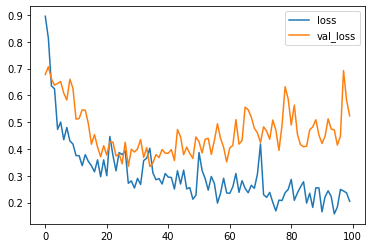

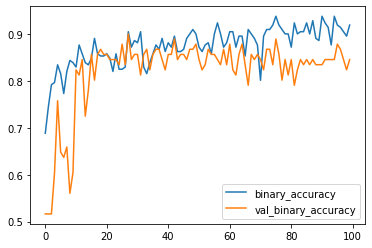

In [29]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

**CNN Model**

In [30]:
def Create_CCN_model(array_ner):
  
  N,dim1=X_train.shape[0],X_train.shape[1]
  input_layer=keras.layers.Input(shape=(dim1,1),name="input_layer")
  # array_ner[0]=100
  # array_ner[1]=100
  # array_ner[2]=100
  array_ner=[270,810,760,300,0]
  model=keras.models.Sequential([input_layer,
                                keras.layers.Conv1D(filters=array_ner[0],kernel_size=(2),strides=(1),padding="same",name="conv1"),
                                keras.layers.MaxPool1D(pool_size=(2),name="maxpool1"),
                                keras.layers.Dropout(0.2),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv1D(filters=array_ner[1],kernel_size=(2),strides=(1),padding="same",name="conv2"),
                                keras.layers.MaxPool1D(pool_size=(2),name="maxpool2"),
                                keras.layers.Dropout(0.2),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv1D(filters=array_ner[2],kernel_size=(2),strides=(1),padding="same",name="conv3"),
                                keras.layers.MaxPool1D(pool_size=(2),name="maxpool3"),
                                keras.layers.Dropout(0.2),
                                keras.layers.BatchNormalization(),
                                keras.layers.Flatten(),
                                keras.layers.Dense(array_ner[3],activation="relu"),
                                keras.layers.Dense(1, activation='sigmoid',name="out_layer")
                                
                                ]
                                
                              )
  
  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],)
  return model

In [31]:
data_train_re=data_train.reshape(data_train.shape[0],data_train.shape[1],1)
data_test_re=data_test.reshape(data_test.shape[0],data_test.shape[1],1)

In [32]:
def funcost(x):
  x[x>=0.5]=1;
  x[x<0.5]=0;
  x=x.astype(int)
  print(x)
  array_ner=np.zeros(3,dtype=int)
  array_ner[0]=int(''.join([str(elem) for elem in x[0:7]]),2)
  array_ner[1]=int(''.join([str(elem) for elem in x[7:14]]),2)
  array_ner[2]= int(''.join([str(elem) for elem in x[14:21]]),2)
  print(array_ner)
  
  model=Create_CCN_model(array_ner)
  model.fit(data_train_re,lbl_train,epochs=100,batch_size=20, verbose=0)
  loss, accuracy = model.evaluate(data_test_re, lbl_test, verbose=0)

  acc=accuracy
  print(acc)
  return 1/acc

In [33]:
N= 2; 
max_Iter = 2;
objf=funcost
lb=0
ub=1
dim = 21;
curve,best_sol=HHO(objf,lb,ub,dim,N,max_Iter)


[0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1]
[  8  80 109]
0.7171052694320679
[0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1]
[ 1 63  3]
0.7434210777282715

Iteration1 Best (BHHO)= 1.3451326979533271
[1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0]
[70 47 48]
0.7894737124443054
[0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1]
[57 47 67]
0.7368420958518982
[1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1]
[117 109  61]
0.7434210777282715
[1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1]
[110  14  31]
0.7368420958518982

Iteration2 Best (BHHO)= 1.2666666213671383


In [34]:
x=best_sol
x=x.astype(int)

array_ner=np.zeros(3,dtype=int)
array_ner[0]=int(''.join([str(elem) for elem in x[0:10]]),2)
array_ner[1]=int(''.join([str(elem) for elem in x[10:20]]),2)
array_ner[2]= int(''.join([str(elem) for elem in x[20:30]]),2)
print(array_ner)

[821 920   0]


In [35]:
X_train_re=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_re=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
model=Create_CCN_model(array_ner)

In [37]:
history = model.fit(
    X_train_re, y_train,
    validation_data=(X_test_re, y_test),
    batch_size=10,
    epochs=100,
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/100
22/22 [==============================] - 7s 89ms/step - loss: 0.6838 - binary_accuracy: 0.7264 - val_loss: 0.6754 - val_binary_accuracy: 0.6813
Epoch 2/100
22/22 [==============================] - 1s 45ms/step - loss: 0.6874 - binary_accuracy: 0.7642 - val_loss: 0.8026 - val_binary_accuracy: 0.4835
Epoch 3/100
22/22 [==============================] - 1s 45ms/step - loss: 0.6291 - binary_accuracy: 0.7783 - val_loss: 0.7573 - val_binary_accuracy: 0.4835
Epoch 4/100
22/22 [==============================] - 1s 45ms/step - loss: 0.5741 - binary_accuracy: 0.7830 - val_loss: 0.8009 - val_binary_accuracy: 0.4835
Epoch 5/100
22/22 [==============================] - 1s 46ms/step - loss: 0.4141 - binary_accuracy: 0.7972 - val_loss: 0.7388 - val_binary_accuracy: 0.4835
Epoch 6/100
22/22 [==============================] - 1s 44ms/step - loss: 0.5575 - binary_accuracy: 0.7925 - val_loss: 0.9789 - val_binary_accuracy: 0.4835
Epoch 7/100
22/22 [==============================] - 1s 45ms/ste

22/22 [==============================] - 1s 45ms/step - loss: 0.1318 - binary_accuracy: 0.9387 - val_loss: 0.7917 - val_binary_accuracy: 0.7253
Epoch 54/100
22/22 [==============================] - 1s 46ms/step - loss: 0.1864 - binary_accuracy: 0.9292 - val_loss: 0.7871 - val_binary_accuracy: 0.7363
Epoch 55/100
22/22 [==============================] - 1s 47ms/step - loss: 0.2104 - binary_accuracy: 0.9104 - val_loss: 0.6507 - val_binary_accuracy: 0.7692
Epoch 56/100
22/22 [==============================] - 1s 45ms/step - loss: 0.1851 - binary_accuracy: 0.9057 - val_loss: 0.8163 - val_binary_accuracy: 0.6923
Epoch 57/100
22/22 [==============================] - 1s 46ms/step - loss: 0.2350 - binary_accuracy: 0.9009 - val_loss: 0.7552 - val_binary_accuracy: 0.7692
Epoch 58/100
22/22 [==============================] - 1s 46ms/step - loss: 0.1461 - binary_accuracy: 0.9481 - val_loss: 0.7801 - val_binary_accuracy: 0.7143
Epoch 59/100
22/22 [==============================] - 1s 46ms/step - lo

In [38]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.683812,0.726415,0.675374,0.681319
1,0.687442,0.764151,0.802551,0.483516
2,0.629054,0.778302,0.757309,0.483516
3,0.574073,0.783019,0.800883,0.483516
4,0.414056,0.797170,0.738795,0.483516
...,...,...,...,...
95,0.129319,0.948113,0.874509,0.736264
96,0.141992,0.943396,0.841508,0.714286
97,0.147175,0.957547,0.887353,0.714286
98,0.119632,0.957547,0.985906,0.736264


Best Validation Loss: 0.4830
Best Validation Accuracy: 0.8132


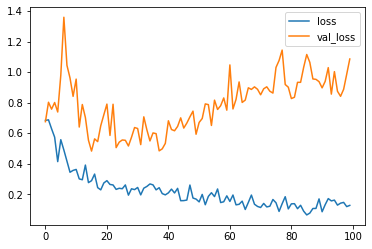

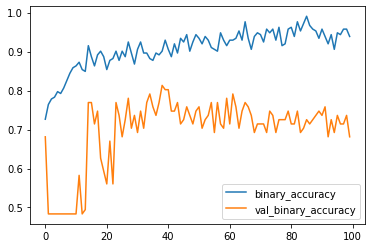

In [39]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))